# 미니프로젝트_장서연

In [1]:
import pandas as pd
import numpy as np

In [2]:
#국민청원 데이터
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [52]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
sns.set_style('whitegrid')
#한글 폰트 사용
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
font_name = mpl.font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
mpl.rc('font', family=font_name)

## 1. 판다스 코드로 자료 둘러보기

### 1) 자료의 수, 행과 열, 정보, 자료형

In [3]:
#자료의 수 확인
df.shape

(395547, 8)

In [4]:
#가장 앞의 3개 행 추출
df.head(3)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
#결측치 확인
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
#데이터 정보
df.info()
#start와 end 열의 자료형이 datetime으로 적절하게 설정되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
# 자료형이 숫자인 자료 요약
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [9]:
#자료형이 문자인 자료 요약
df.describe(include=np.object)
#category의 경우 count 대비 unique의 수가 작음.

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


### 2) 답변 대상 청원 자료 둘러보기
* 답변 대상 청원: 20만건 이상의 투표를 받은 청원의 수만건 이상의 투표를 받은 청원의 수
* 청원별 답변 대상 여부

In [42]:
df['answer'] = (df['votes'] > 200000) == 1
df['answer'] = df['answer'].astype('int')
df[df['answer']==1].head(3)

,article_id,start,end,answered,votes,category,title,content,start_month,start_day,start_hour,start_dow,answer
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,9,3,0,6,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,9,6,0,2,1
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,9,30,0,5,1


In [48]:
#답변 대상 청원의 수
print(df['answer'].sum())

80


In [157]:
#답변 대상 청원만 추출
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 13)

### 3) 카테고리 종류별로 자료 둘러보기

In [140]:
#카테고리 종류별 기사의 수
category = pd.DataFrame(df['category'].value_counts(ascending=False)).reset_index()
category.columns = ['category', 'counts']
category 

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


In [229]:
#카테고리별 답변 대상 청원의 수
category_ans = pd.DataFrame(df[['answer','answered']].groupby(df['category']).sum()).reset_index()
category_ans.columns = ['category', 'answer', 'answered']
category_ans['diff'] = category_ans['answer']-category_ans['answered']
category_ans

,category,answer,answered,diff
0,경제민주화,2,1,1
1,교통/건축/국토,3,2,1
2,기타,8,1,7
3,농산어촌,0,0,0
4,문화/예술/체육/언론,7,4,3
5,미래,1,1,0
6,반려동물,4,0,4
7,보건복지,3,2,1
8,성장동력,2,2,0
9,안전/환경,10,2,8


### 4) 시계열 자료 둘러보기

In [266]:
df['start'].min()

Timestamp('2017-08-19 00:00:00')

In [267]:
df['start'].max()

Timestamp('2019-02-04 00:00:00')

In [255]:
#시작일을 기준으로, 시계열 자료 쪼개기
#년도만 추출
df['start_year'] = df['start'].dt.year
#달만 추출
df['start_month'] = df['start'].dt.month
#일만 추출
df['start_day'] = df['start'].dt.day
#시만 추출
df['start_hour'] = df['start'].dt.hour
#요일만 추출(0:일요일/1:월/2:화/3:수/4:목/5:금/6:토)
df['start_dow'] = df['start'].dt.dayofweek
df.shape

(395547, 14)

In [16]:
df.iloc[:,-4:].head()

,start_month,start_day,start_hour,start_dow
0,8,19,0,5
1,8,19,0,5
2,8,19,0,5
3,8,19,0,5
4,8,19,0,5


In [243]:
#달별 청원수.
df.value_counts('start_month').reset_index()

,start_month,0
0,1,52941
1,11,52847
2,9,40888
3,12,38498
4,10,31687
5,8,28851
6,2,28117
7,7,25714
8,5,25499
9,6,25483


In [18]:
# 요일별 청원수.
df.value_counts('start_dow').reset_index()

,start_dow,0
0,1,65229
1,3,63072
2,2,61966
3,4,56646
4,0,54234
5,5,50984
6,6,43416


### 5) 원하는 주제 관련 자료 살펴보기

In [29]:
#주식 관련 기사 추출
stock = pd.DataFrame(df[(df.title.str.find('주식')!= -1)|( df.content.str.find('주식')!= -1)|
           ( df.title.str.find('주가')!= -1)|( df.content.str.find('주가')!= -1)])
stock.shape

(12235, 12)

In [30]:
stock.head()

,article_id,start,end,answered,votes,category,title,content,start_month,start_day,start_hour,start_dow
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,8,19,0,5
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...",8,19,0,5
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,...",8,20,0,6
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...,8,20,0,6
81,105,2017-08-20,2017-09-19,0,2212,육아/교육,중등교과교사티오 증원을 요청합니다.(제발 읽어주세요),저는 중등학교 현직교사입니다.\n중등교사 가티오를 본 후 충격을 받고 글을 쓰게 ...,8,20,0,6


## 2. 그래프 그리기

In [132]:
sns.set_style('whitegrid')
#한글 폰트 사용
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
font_name = mpl.font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
mpl.rc('font', family=font_name)

### 1) 주제별 등록된 청원의 수

In [168]:
category.head(3)

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993


In [230]:
category_ans.columns = ['category', 'answer', '답변 등록', '답변 미등록']
category_ans.head(3)

,category,answer,답변 등록,답변 미등록
0,경제민주화,2,1,1
1,교통/건축/국토,3,2,1
2,기타,8,1,7


In [234]:
category1 = pd.DataFrame(df['category'].value_counts(ascending=True)).reset_index()
category1.columns = ['category', 'counts']
category1 = pd.merge(category1, category_ans, how="left")
category1

,category,counts,answer,답변 등록,답변 미등록
0,농산어촌,1902,0,0,0
1,저출산/고령화대책,3584,0,0,0
2,반려동물,4057,4,0,4
3,성장동력,7253,2,2,0
4,경제민주화,16793,2,1,1
5,미래,18000,1,1,0
6,문화/예술/체육/언론,18207,7,4,3
7,행정,20268,1,1,0
8,일자리,23225,0,0,0
9,보건복지,24848,3,2,1


<IPython.core.display.Javascript object>


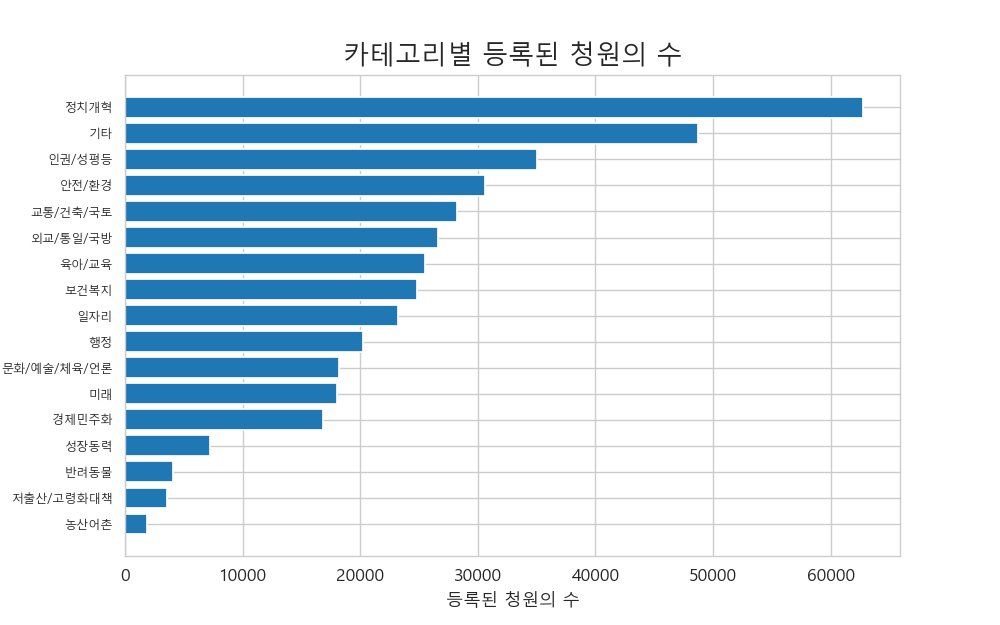

In [235]:
fig = plt.figure(figsize=(8,5))
label = category1['category']
n = np.arange(17)
ax = fig.add_subplot(1,1,1)
ax = plt.barh(n, category1['counts'], align='center')
plt.title('카테고리별 등록된 청원의 수', fontsize=15)
plt.xlabel('등록된 청원의 수', fontsize=10)
plt.yticks(n, label, fontsize=7)

plt.show()

### 2) 주제별 답변 대상 청원의 수

<IPython.core.display.Javascript object>


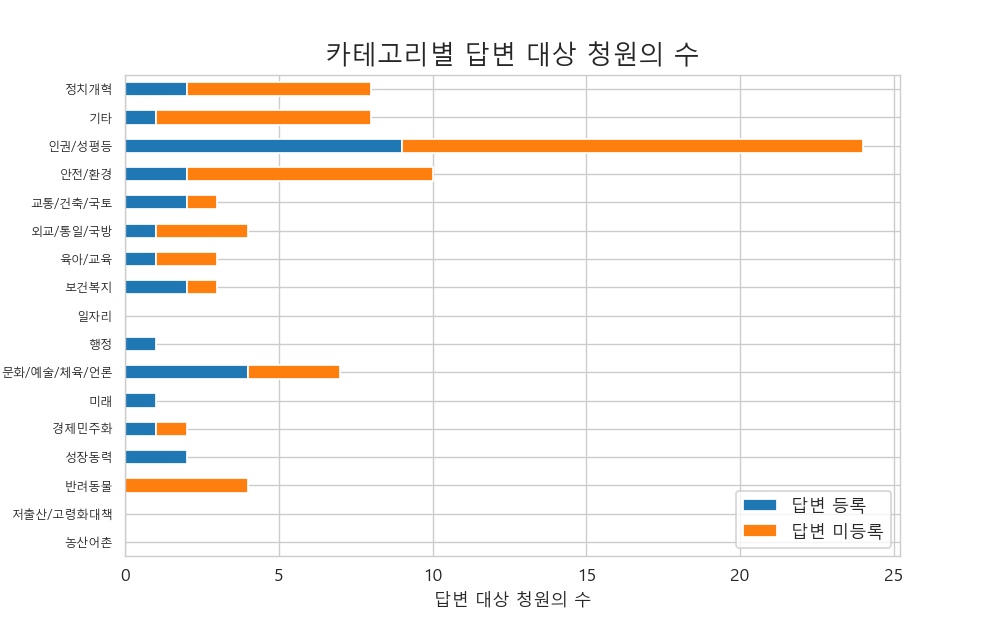

In [238]:
fig,ax = plt.subplots(figsize=(8,5))
label = category1['category']
n = np.arange(17)
ax = category1[['답변 등록','답변 미등록']].plot(kind='barh', stacked=True, ax=ax)
plt.title('카테고리별 답변 대상 청원의 수', fontsize=15)
plt.xlabel('답변 대상 청원의 수', fontsize=10)
plt.yticks(n, label, fontsize=7)
plt.show()

### 1), 2) 그래프 비교하기

<IPython.core.display.Javascript object>


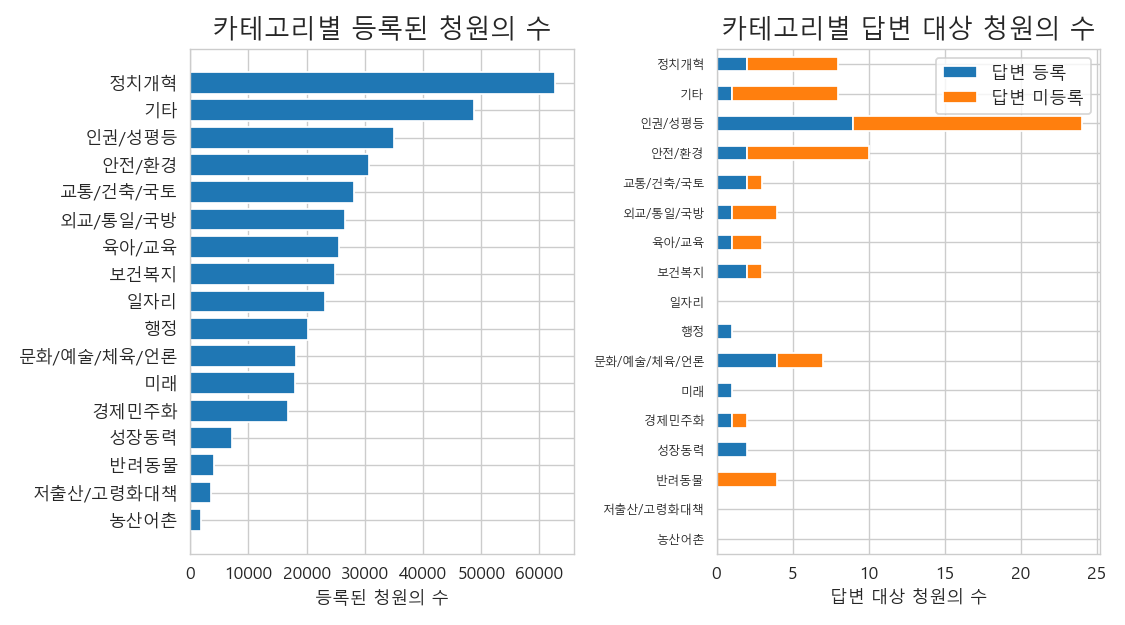

In [241]:
fig = plt.figure(figsize=(9,5))
label = category1['category']
n = np.arange(17)
ax = fig.add_subplot(1,2,1)
ax = plt.barh(n, category1['counts'])
plt.title('카테고리별 등록된 청원의 수', fontsize=15)
plt.xlabel('등록된 청원의 수', fontsize=10)
plt.yticks(n, label)

ax = fig.add_subplot(1,2,2)
ax = category1[['답변 등록','답변 미등록']].plot(kind='barh', stacked=True, ax=ax)
plt.title('카테고리별 답변 대상 청원의 수', fontsize=15)
plt.xlabel('답변 대상 청원의 수', fontsize=10)
plt.yticks(n, label, fontsize=7)
plt.show()

fig.tight_layout()
plt.show()

### 3) 시계열 그래프 그리기

<IPython.core.display.Javascript object>


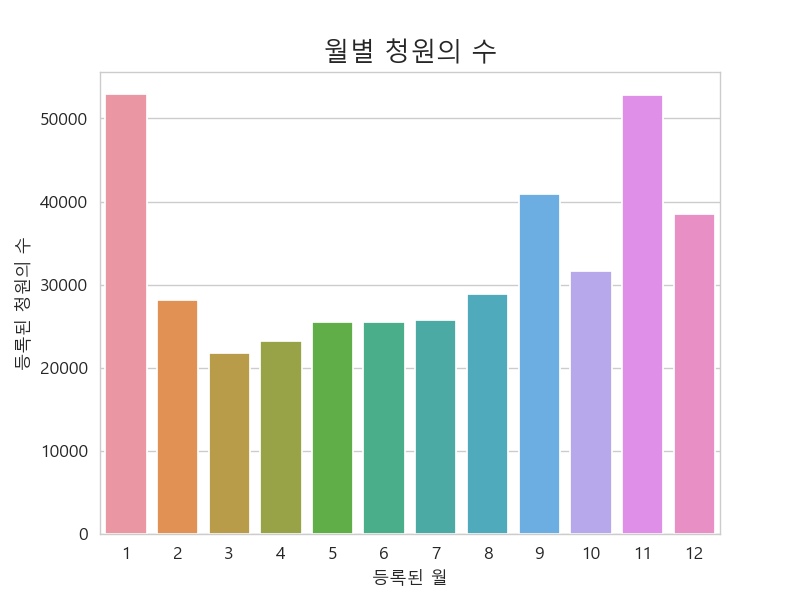

Text(0, 0.5, '등록된 청원의 수')

In [248]:
# 월별 등록 청원 수 분포
ax = plt.subplots()
ax = sns.countplot(df['start_month'])
plt.title('월별 청원의 수', fontsize=15)
plt.xlabel('등록된 월')
plt.ylabel('등록된 청원의 수')

In [268]:
df['start'].min()

Timestamp('2017-08-19 00:00:00')

In [269]:
df['start'].max()

Timestamp('2019-02-04 00:00:00')

In [277]:
#일별 청원 수 분포
ax = plt.subplots()
ax = sns.distplot(df['start'], hist=False)
plt.title('[2017.08.19~2019.02.04]\n청원의 수', fontsize=15)
plt.xlabel('등록된 시기')
plt.ylabel('등록된 청원의 수')

<IPython.core.display.Javascript object>

Text(0, 0.5, '등록된 청원의 수')

### 4) 주가 관련 청원 등록일

In [272]:
stock.head(3)

,article_id,start,end,answered,votes,category,title,content,start_month,start_day,start_hour,start_dow
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,8,19,0,5
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...",8,19,0,5
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,...",8,20,0,6


<IPython.core.display.Javascript object>


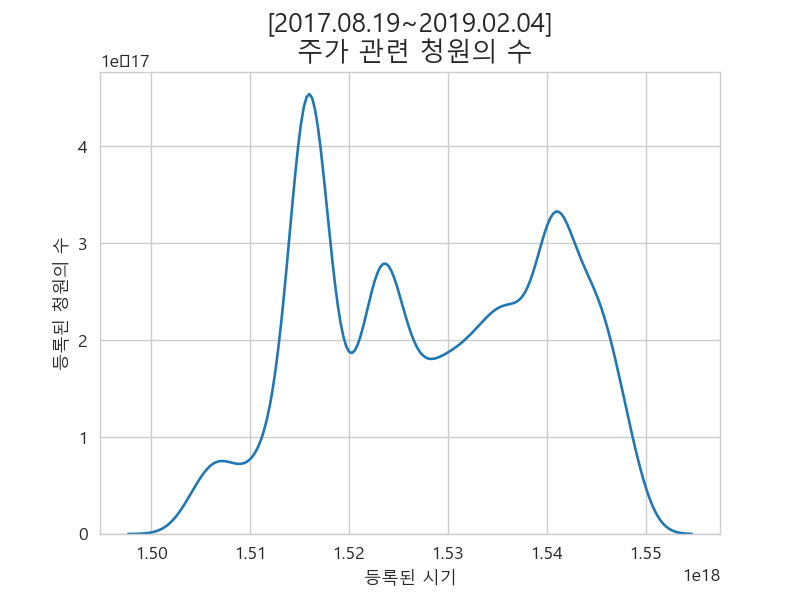

Text(0, 0.5, '등록된 청원의 수')

In [276]:
#일별 청원 수 분포
ax = plt.subplots()
ax = sns.distplot(stock['start'], hist=False)
plt.title('[2017.08.19~2019.02.04]\n 주가 관련 청원의 수', fontsize=15)
plt.xlabel('등록된 시기')
plt.ylabel('등록된 청원의 수')

### 5) 카테고리별 시계열 그래프

In [384]:
#카테고리별 일별 등록된 청원의 수
df2 = pd.DataFrame(df.groupby(['category','start']).article_id.count())
df2 = df2.reset_index()
df2.columns=['카테고리', 'start', 'count']
df2

,카테고리,start,count
0,경제민주화,2017-08-19,3
1,경제민주화,2017-08-20,2
2,경제민주화,2017-08-21,3
3,경제민주화,2017-08-22,1
4,경제민주화,2017-08-23,1
...,...,...,...
8967,행정,2019-01-31,49
8968,행정,2019-02-01,25
8969,행정,2019-02-02,32
8970,행정,2019-02-03,24


In [415]:
#시각화를 위해 형식을 바꿔 새로 dataFrame 생성
df3 = pd.DataFrame(df2['start'].unique())
df3.columns = ['start']
index = df2['카테고리'].unique()
for i in index:
    ls = df2[df2['카테고리']==i].drop(['카테고리'], axis=1)
    ls.columns = ['start', i]
    df3 = pd.merge(df3, ls, how="left")
df3.index = df3['start']
df3.drop(['start'],axis=1,inplace = True)
df3=df3.fillna(0)

df3['전체'] = 0
for i in index:
    df3['전체'] =+ df3[i]
    
df3

,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정,전체
start,,,,,,,,,,,,,,,,,,
2017-08-19,3.0,0.0,3,0.0,1.0,3.0,1.0,4.0,0.0,1.0,6.0,5.0,2.0,9.0,0.0,1.0,0.0,0.0
2017-08-20,2.0,16.0,8,0.0,4.0,1.0,0.0,6.0,0.0,2.0,8.0,26.0,1.0,10.0,0.0,1.0,3.0,3.0
2017-08-21,3.0,18.0,16,3.0,1.0,0.0,2.0,10.0,0.0,0.0,10.0,7.0,2.0,8.0,3.0,1.0,5.0,5.0
2017-08-22,1.0,5.0,14,2.0,3.0,1.0,2.0,10.0,0.0,5.0,5.0,8.0,1.0,4.0,0.0,2.0,6.0,6.0
2017-08-23,1.0,7.0,9,1.0,1.0,1.0,1.0,8.0,1.0,5.0,9.0,10.0,1.0,11.0,3.0,0.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-28,0.0,6.0,10,0.0,2.0,1.0,0.0,15.0,0.0,4.0,4.0,29.0,2.0,9.0,0.0,2.0,5.0,5.0
2017-08-29,0.0,12.0,10,1.0,1.0,0.0,0.0,22.0,1.0,6.0,5.0,34.0,3.0,6.0,2.0,1.0,14.0,14.0
2017-09-15,0.0,3.0,9,2.0,9.0,1.0,0.0,4.0,0.0,1.0,24.0,2.0,4.0,4.0,0.0,5.0,6.0,6.0


<IPython.core.display.Javascript object>


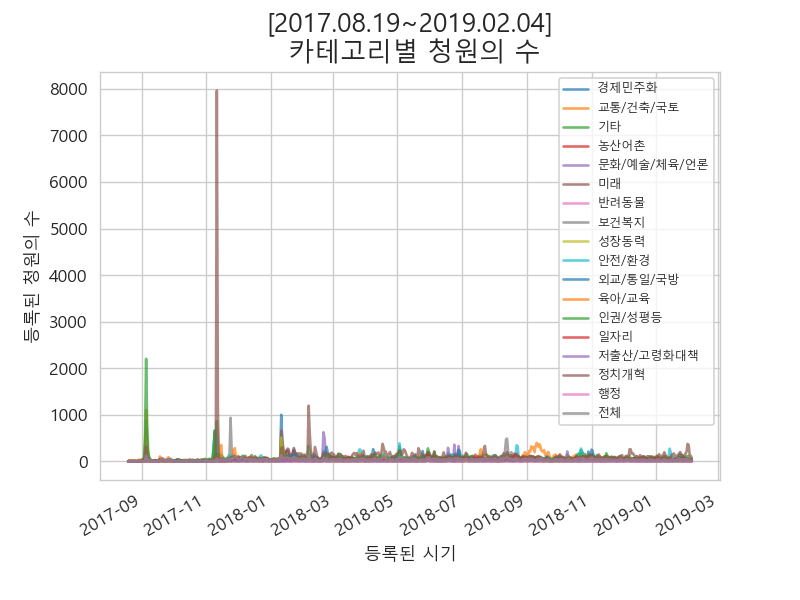

In [419]:
#카테고리별 일별 청원 수 분포
fig,ax = plt.subplots()
ax = df3.plot(alpha=0.7, ax=ax)
plt.title('[2017.08.19~2019.02.04]\n 카테고리별 청원의 수', fontsize=15)
plt.xlabel('등록된 시기')
plt.ylabel('등록된 청원의 수')
plt.legend(loc='upper right', fontsize=7)